![example](images/director_shot.jpeg)

# Microsoft Movie Studio

Author : Vrushali Sudha

This project implements Exploratory Data Analysis to quantifiably investigate and enable Microsoft to determine the type of movies to invest in before launching their new venture:

“Microsoft Movie Studio”

BUSINESS PROBLEM:-
Microsoft wants to invest in making original movie content and be the 
likes of prospective contemporaries like Amazon prime, HBO and 
Netflix.

As a start-up , in this new venture, its imperative to identify and discern the 
recent trends in movie making business that gravitate to the popularity 
charts of IMDB

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Importing 3 datasets

In [2]:
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz", encoding='latin-1')
imdb_title_basics_df =  pd.read_csv("zippedData/imdb.title.basics.csv.gz", encoding='latin-1')
imdb_title_ratings_df =  pd.read_csv("zippedData/imdb.title.ratings.csv.gz", encoding='latin-1' )
 

Movie gross
Movie gross is a dataset that describes movie titles, which studio the movie is from, the domestic gross, the foreign gross and the year in which the movie was produced.

In [3]:
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


MDB title basics
IMDB title basics gives the title, the day the movie was released, movie length, the genres and a tconst value a unique value to identify the Movie

In [4]:
imdb_title_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho TeÃ³philo - O Legado de um Pioneiro,Rodolpho TeÃ³philo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


MDB title ratings
The dataset gives the average of the tconst ids of the movies and the number of votes that gave the specific rating.

In [5]:

imdb_title_ratings_df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Merge imdb_title_basics_df and imdb_title_ratings_df in New Data frame imdb_merge_df

In [6]:
imdb_merge_df = pd.merge(imdb_title_basics_df, imdb_title_ratings_df,left_on = "tconst", right_on="tconst", how="inner")
imdb_merge_df


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Ãocuklari,Sokagin Ãocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


Slice imdb_merge_df  so that it contains most recent information about movies that are released from 2015 onwards in imdb_recent_movies

In [7]:
imdb_recent_movies = imdb_merge_df.loc[imdb_merge_df["start_year"] >= 2015]
imdb_recent_movies


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Ãocuklari,Sokagin Ãocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


 Slice movie_gross_df dataframe to so that it contains most recent information about movies that are produced from 2015 onwards in imdb_recently_produced

In [8]:
imdb_recently_produced = movie_gross_df.loc[movie_gross_df['year'] >= 2015]
imdb_recently_produced

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
1876,Minions,Uni.,336000000.0,823400000,2015
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


FINAL MERGE - Merge imdb_recently_produced and imdb_recent_movies in project_df

In [9]:
project_df = pd.merge(imdb_recently_produced, imdb_recent_movies, left_on="title", right_on="original_title", how="inner")
project_df


,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Jurassic World,Uni.,652300000.0,"1,019.4",2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
1,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,Minions,Uni.,336000000.0,823400000,2015,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917
3,Spectre,Sony,200100000.0,680600000,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504
4,Inside Out,BV,356500000.0,501100000,2015,tt2096673,Inside Out,Inside Out,2015,95.0,"Adventure,Animation,Comedy",8.2,536181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,Oolong Courtyard,CL,37700.0,NaN,2018,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61
921,Loving Pablo,Uni.,22000.0,NaN,2018,tt4682788,Loving Pablo,Loving Pablo,2017,123.0,"Action,Biography,Crime",6.3,13988
922,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama,5.9,1290
923,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823


In [10]:

project_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 924
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            925 non-null    object 
 1   studio           924 non-null    object 
 2   domestic_gross   921 non-null    float64
 3   foreign_gross    569 non-null    object 
 4   year             925 non-null    int64  
 5   tconst           925 non-null    object 
 6   primary_title    925 non-null    object 
 7   original_title   925 non-null    object 
 8   start_year       925 non-null    int64  
 9   runtime_minutes  916 non-null    float64
 10  genres           924 non-null    object 
 11  averagerating    925 non-null    float64
 12  numvotes         925 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 101.2+ KB


In [11]:
project_df["runtime_minutes"] = project_df["runtime_minutes"].fillna(imdb_recent_movies["runtime_minutes"].median())


In [12]:
project_df["foreign_gross"] = project_df["foreign_gross"].astype("str")
project_df["foreign_gross"] = project_df["foreign_gross"].map(lambda x: x.replace(",", ""))
project_df["foreign_gross"] = project_df["foreign_gross"].fillna("missing")


In [13]:
project_df["rating_type"] = project_df["averagerating"].map(lambda x: "High" if x >= 8 else ("Low" if x <= 6 else "Medium"))
project_df["rating_type"].value_counts()

Medium    604
Low       279
High       42
Name: rating_type, dtype: int64

In [14]:
project_df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_type
0,Jurassic World,Uni.,652300000.0,1019.4,2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Medium
1,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,Medium
2,Minions,Uni.,336000000.0,823400000,2015,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,Medium
3,Spectre,Sony,200100000.0,680600000,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504,Medium
4,Inside Out,BV,356500000.0,501100000,2015,tt2096673,Inside Out,Inside Out,2015,95.0,"Adventure,Animation,Comedy",8.2,536181,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,Oolong Courtyard,CL,37700.0,nan,2018,tt8549902,Oolong Courtyard: KungFu School,Oolong Courtyard,2018,103.0,Comedy,4.6,61,Low
921,Loving Pablo,Uni.,22000.0,nan,2018,tt4682788,Loving Pablo,Loving Pablo,2017,123.0,"Action,Biography,Crime",6.3,13988,Medium
922,The Escape,IFC,14000.0,nan,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama,5.9,1290,Low
923,Souvenir,Strand,11400.0,nan,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823,Low


In [15]:
project_df["movie_size"] = project_df["runtime_minutes"].map(lambda x: "Long(150 mins or above" if x >= 150 else("short (100 mins or below)" if x <= 100 else "medium (between 100 and 150 mins"))
project_df["movie_size"].value_counts()


medium (between 100 and 150 mins    533
short (100 mins or below)           355
Long(150 mins or above               37
Name: movie_size, dtype: int64

In [16]:
project_df["foreign_gross"] = project_df["foreign_gross"].astype("float")
project_df["domestic_gross"] = project_df["domestic_gross"].astype("float")


In [17]:
project_df["worldwide_gross"] = project_df["domestic_gross"] +  project_df["foreign_gross"]

In [18]:
project_df = project_df.dropna()
project_df

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,rating_type,movie_size,worldwide_gross
0,Jurassic World,Uni.,652300000.0,1019.4,2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Medium,medium (between 100 and 150 mins,6.523010e+08
1,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,Medium,medium (between 100 and 150 mins,1.405400e+09
2,Minions,Uni.,336000000.0,823400000.0,2015,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,Medium,short (100 mins or below),1.159400e+09
3,Spectre,Sony,200100000.0,680600000.0,2015,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller",6.8,352504,Medium,medium (between 100 and 150 mins,8.807000e+08
4,Inside Out,BV,356500000.0,501100000.0,2015,tt2096673,Inside Out,Inside Out,2015,95.0,"Adventure,Animation,Comedy",8.2,536181,High,short (100 mins or below),8.576000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854,High,medium (between 100 and 150 mins,2.191000e+06
873,I Still See You,LGF,1400.0,1500000.0,2018,tt2160105,I Still See You,I Still See You,2018,98.0,"Fantasy,Thriller",5.7,5010,Low,short (100 mins or below),1.501400e+06
881,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,tt4602066,The Catcher Was a Spy,The Catcher Was a Spy,2018,98.0,"Biography,Drama,War",6.2,4653,Medium,short (100 mins or below),9.540000e+05
894,Time Freak,Grindstone,10000.0,256000.0,2018,tt6769280,Time Freak,Time Freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455,Low,medium (between 100 and 150 mins,2.660000e+05


In [19]:
project_df["genres"] = project_df["genres"].map(lambda x: x.split(","))

C:\Users\vrush\AppData\Local\Temp\ipykernel_14896\2190756145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_df["genres"] = project_df["genres"].map(lambda x: x.split(","))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Biography'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Documentary'),
  Text(7, 0, 'Drama'),
  Text(8, 0, 'Family'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Music'),
  Text(13, 0, 'Musical'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Romance'),
  Text(16, 0, 'Sci-Fi'),
  Text(17, 0, 'Sport'),
  Text(18, 0, 'Thriller'),
  Text(19, 0, 'War')])

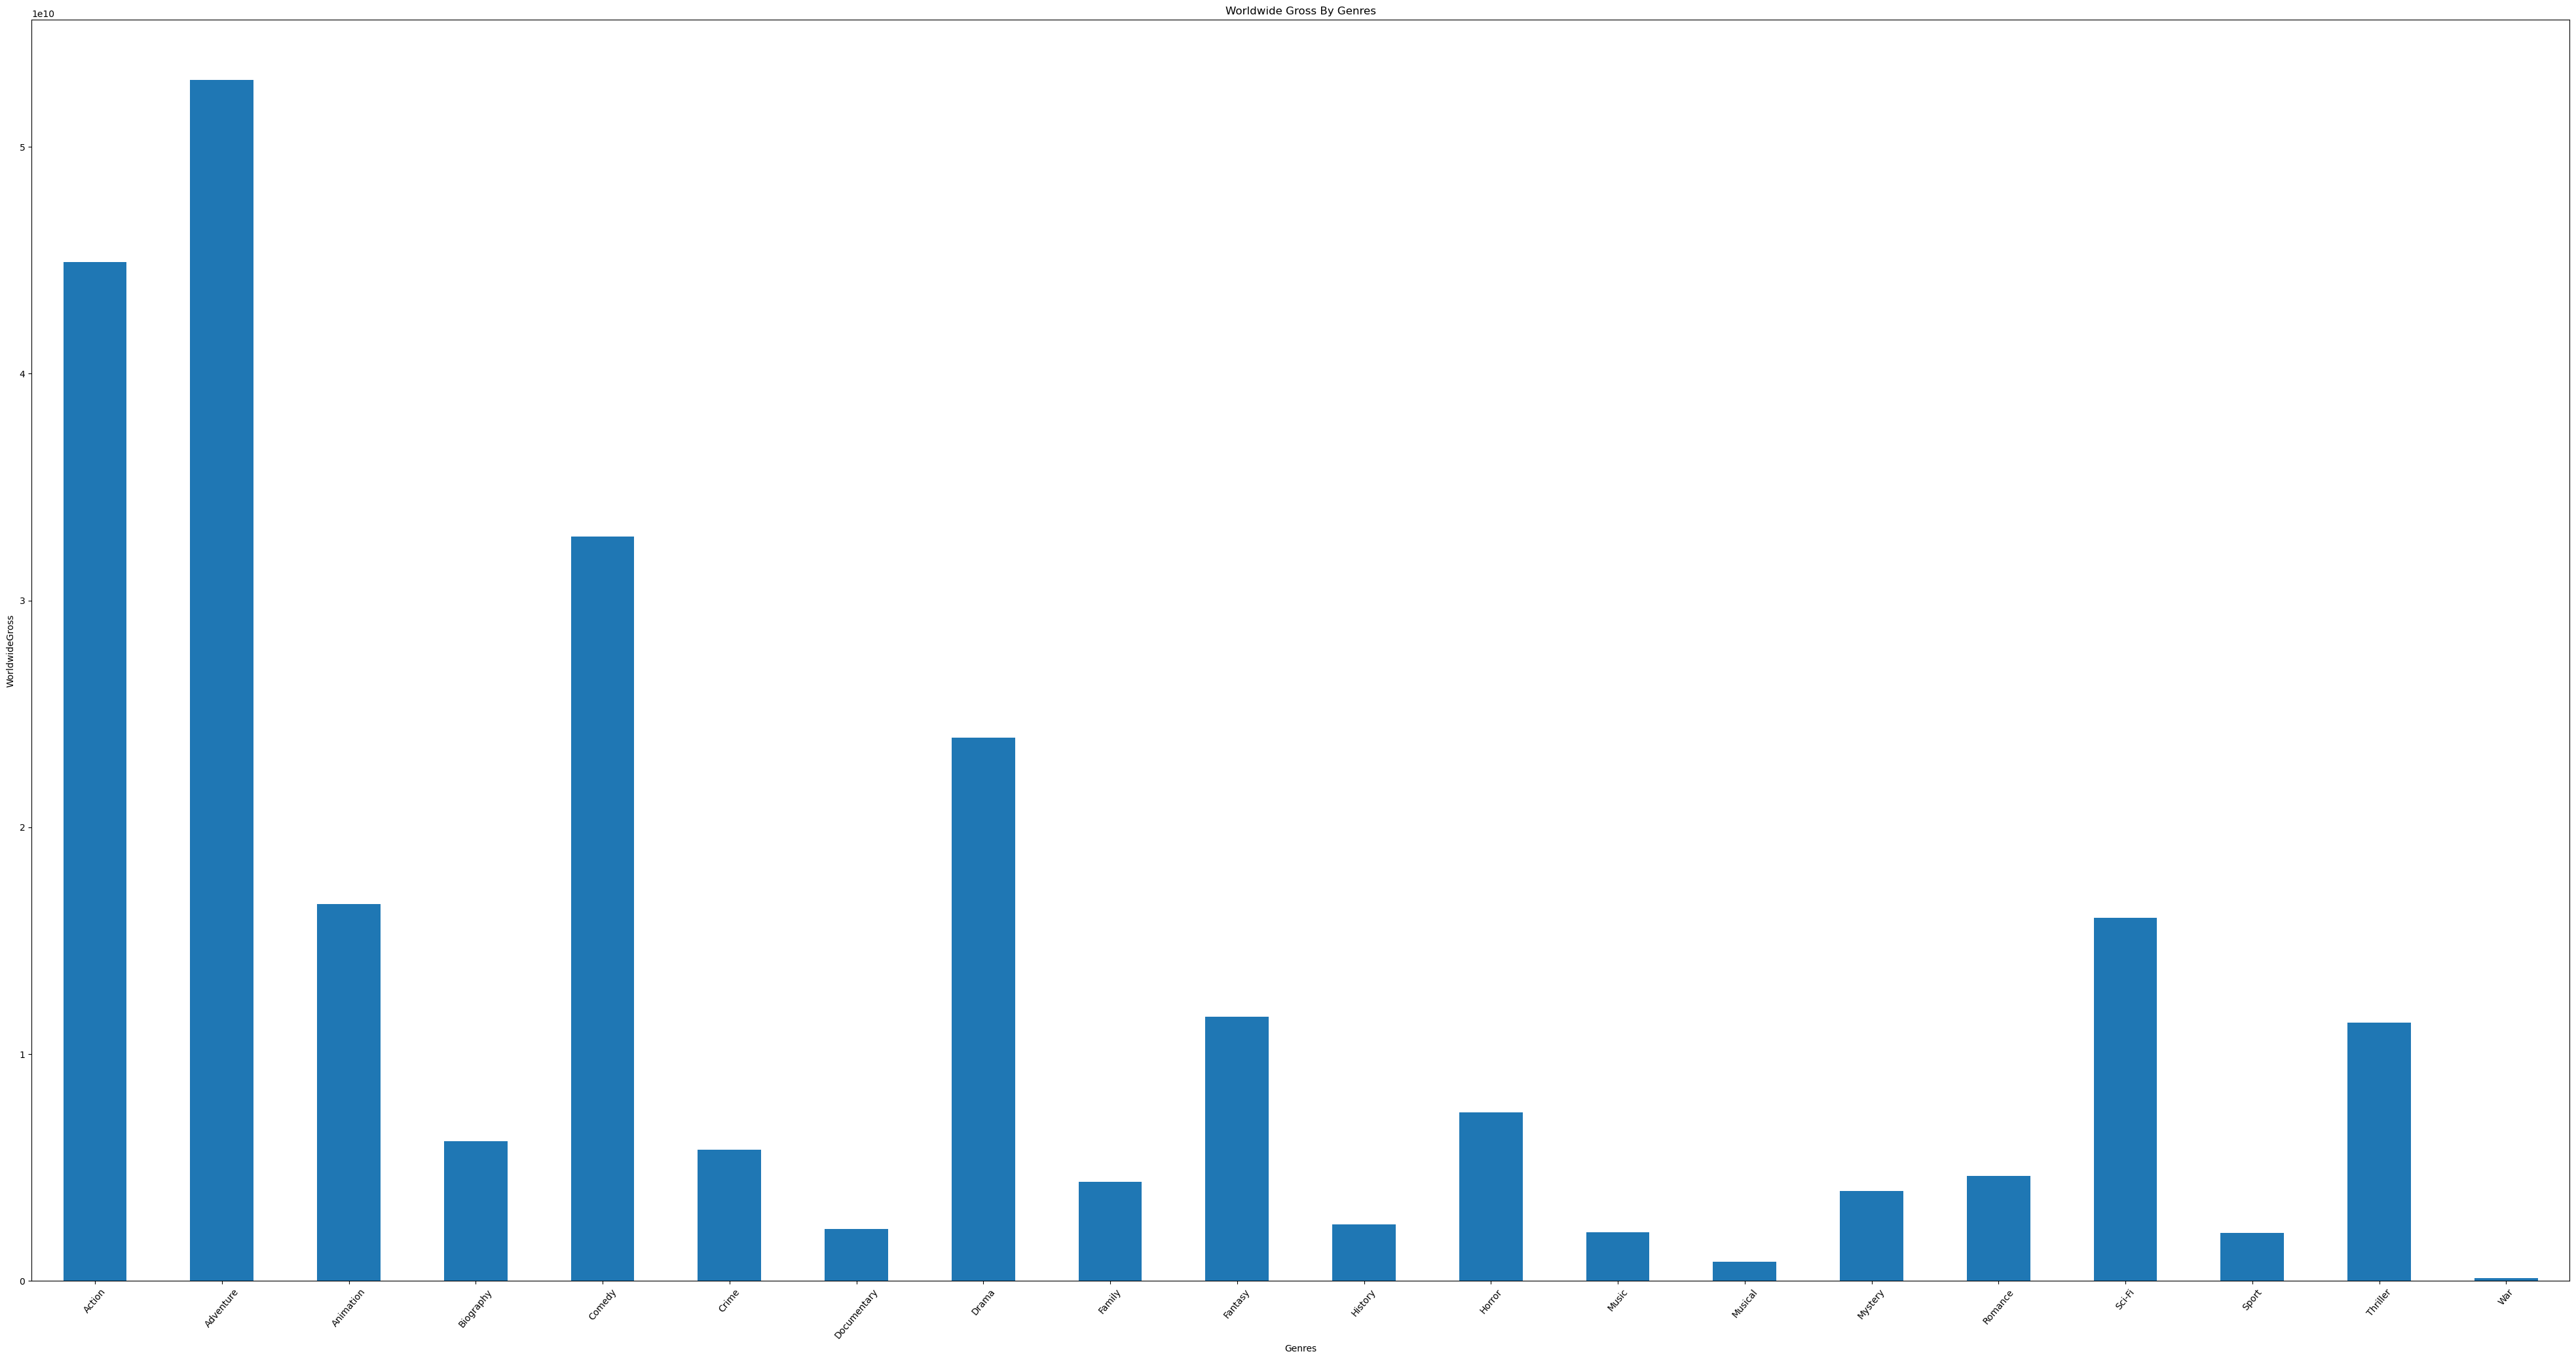

In [20]:
df1_groups = project_df.explode("genres").groupby("genres")["worldwide_gross"].sum()
df1_groups.plot(kind='bar', fontsize = 10, title='Worldwide Gross By Genres',
               ylabel='WorldwideGross', xlabel='Genres', figsize=(50, 25))


plt.xticks(rotation=50)

Recommendation  1:-
Action, Adventure , Comedy ,Drama do very well in terms of yeilding Gross profitability

Text(0.5, 1.0, 'Popularity vs rating type')

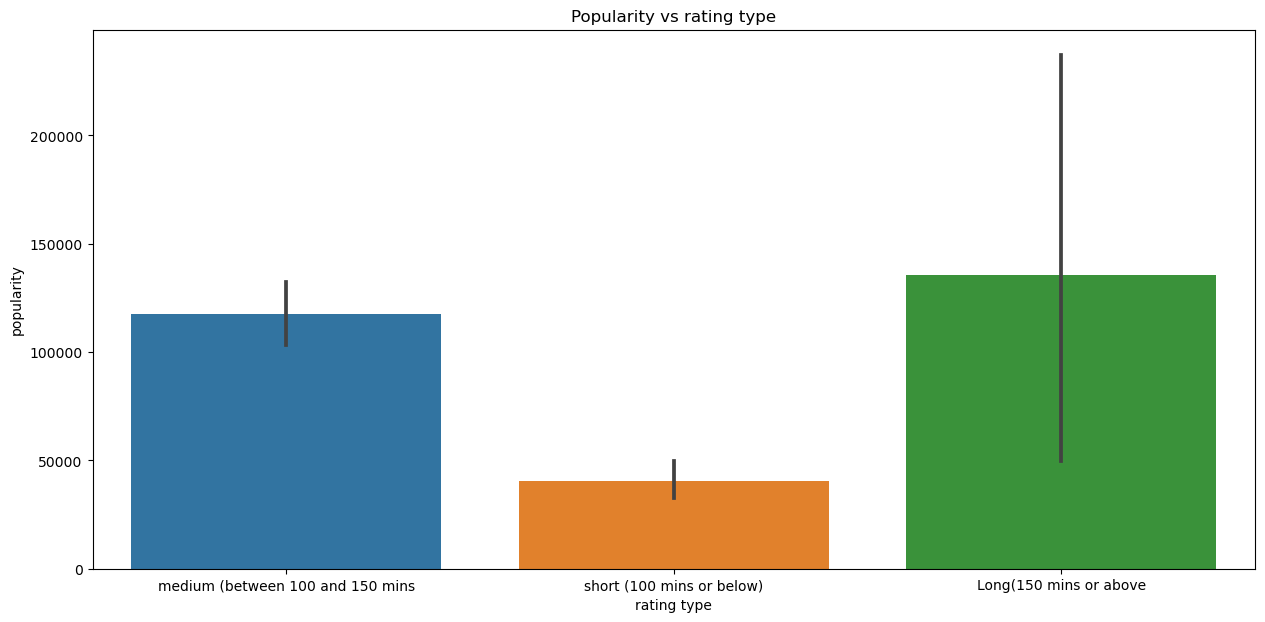

In [21]:
fig3, ax = plt.subplots(figsize=(15, 7))

sns.barplot(x="movie_size", y="numvotes",ax = ax, data=project_df)

ax.set_xlabel("rating type")
ax.set_ylabel("popularity")
ax.set_title("Popularity vs rating type")
#ax.yaxis.set_major_formatter(formatter1)

Recommendation  2:-
Its seems that long movies are more popular than medium or short movies. From a business perspective longer movies should be produced in a larger quantity.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 [Text(0, 0, 'A24'),
  Text(1, 0, 'Abr.'),
  Text(2, 0, 'Affirm'),
  Text(3, 0, 'Amazon'),
  Text(4, 0, 'Annapurna'),
  Text(5, 0, 'Aviron'),
  Text(6, 0, 'BBC'),
  Text(7, 0, 'BG'),
  Text(8, 0, 'BH Tilt'),
  Text(9, 0, 'BST'),
  Text(10, 0, 'BV'),
  Text(11, 0, 'Blue Fox'),
  Text(12, 0, 'CL'),
  Text(13, 0, 'EC'),
  Text(14, 0, 'ENTMP'),
  Text(15, 0, 'EOne'),
  Text(16, 0, 'FIP'),
  Text(17, 0, 'FM'),
  Text(18, 0, 'FR'),
  Text(19, 0, 'FRun'),
  Text(20, 0, 'FUN'),
  Text(21, 0, 'Focus'),
  Text(22, 0, 'Fox'),
  Text(23, 0, 'FoxS'),
  Text(24, 0, 'Global Road'),
  Text(25, 0, 'Good Deed'),
  Text(26, 0, 'Greenwich'),
  Text(27, 0, 'Grindstone'),
  Text(28, 0, 'GrtIndia'),
  Text(29, 0, 'IFC'),
  

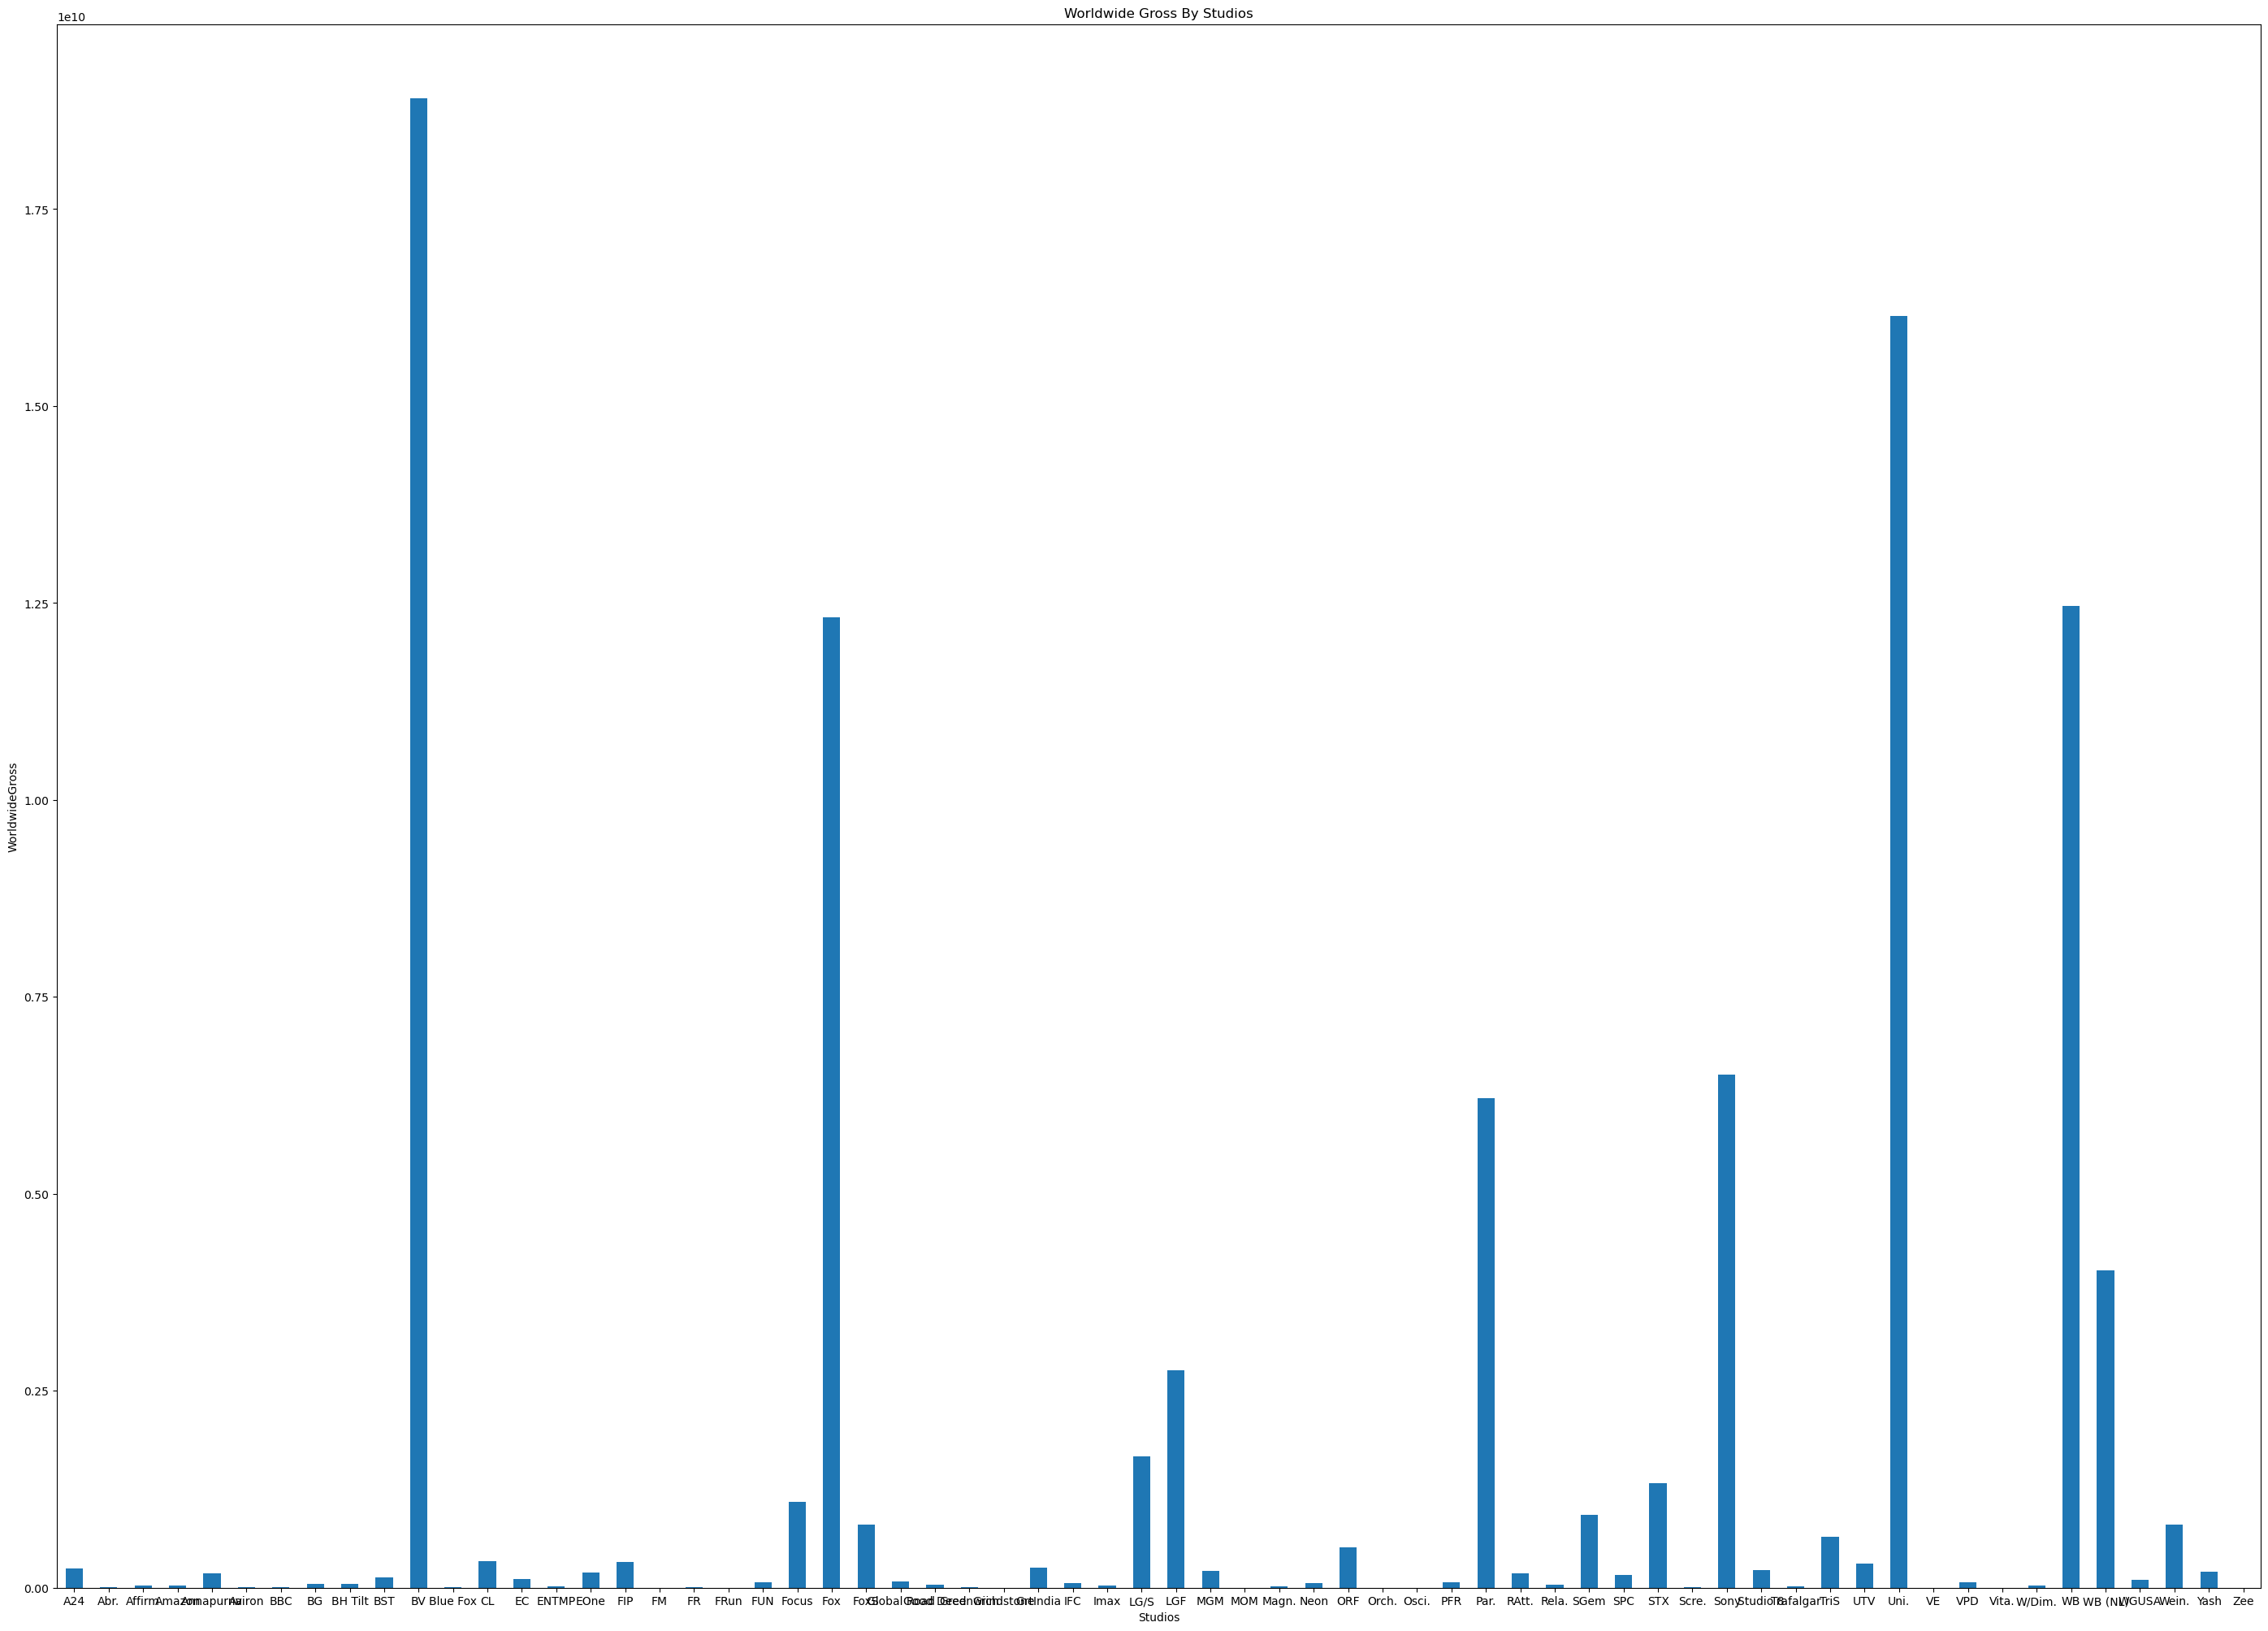

In [22]:
df_groups = project_df.groupby(['studio'])['worldwide_gross'].sum()
df_groups.plot(kind='bar', fontsize = 10, title='Worldwide Gross By Studios',
               ylabel='WorldwideGross', xlabel='Studios', figsize=(35, 25))


plt.xticks(rotation=0)

Recommendation  3:-
Make worldwide releases with BV, Universal, Warner Brothers and Fox as they have am empirical history of making high gross profits with their movies

Limitations of the Analysis
This may have implications on the proposed recommendations.
1. There are only 3 datasets that are used, none of which provide information 
about the cost of production to identify the net profit and ROI (return on 
investment). Its only domestic and foreign gross profits that are being used. 
Production cost is very critical in identifying the genres of movies that are more 
lucrative from a cost benefit analysis. 
2. The three datasets are used from imdb (one data source) which inhibits a wider 
& integrated perspective in the conclusive findings.